# EfficientDet

### 등장 배경
- Object Detection은 속도가 중요 -> 실생활에 사용되기 위해 모델의 사이즈와 대기 시간에 제약이 존재(사이즈와 연산량 고려)
- Backbone, Feature map, Pyramid Network, Box classification head, Class classificiation head를 동시에 Scale Up

### 한계
1) Efficient multi-scale feature fusion
  - 기존의 FPN 기반에서는 High level feature map과 Low level feature map을 더할 때 channel과 resolution을 맞추어서 단순합
  - EfficientDet 이전에는 multi-scale feature fusion을 위해 FPN, PANet, NAS-FPN, AUG-FPN과 같은 Neck 사용
  - 대부분 기존 연구는 resolution 구분 없이 feature map을 단순합
2) Model Scaling
  - 기존 모델들은 backbone과 이미지의 size를 무조건 크게 키우는데만 집중

##### 1) Efficient multi-scale feature fusion
- 각각의 input을 위한 학습 가능한 weight를 두는 Weighted Feature Fusion 방법으로 BiFPN(bi-directional feature pyramid network)를 제안
- 기존 FPN과 PANet의 모델 개선 -> 모델의 Efficiency를 향상 시키기 위해 cross-scale connections 방법을 이용
- process_1: 하나의 간선을 가진 노드는 제거 -> output 노드에 input 노드 간선 추가 -> 양방향 path 각각을 하나의 feature layer로 취급하여, repeated blocks 활용
 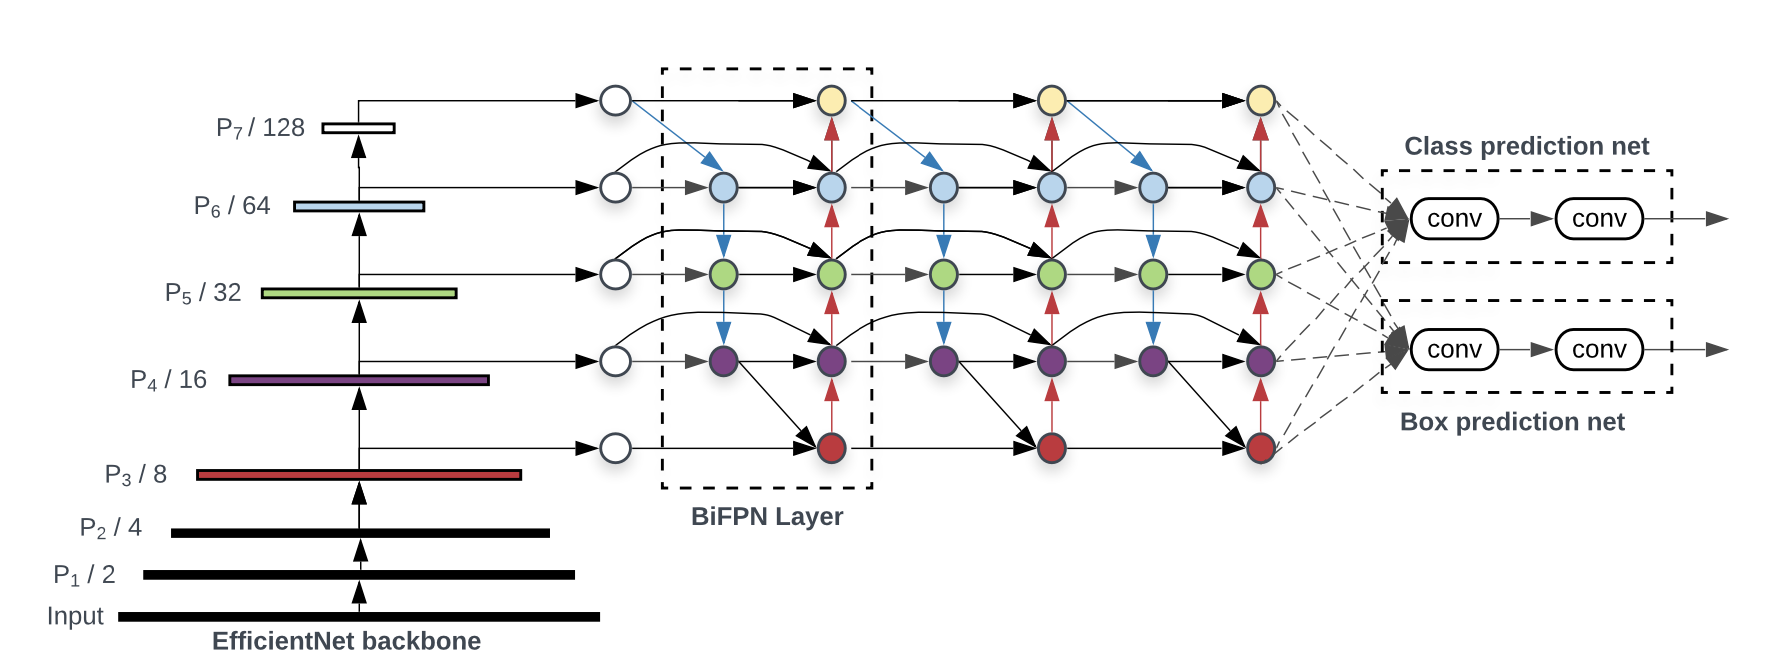

- EfficientDet은 여러 resolution의 feature map을 가중 합
- FPN의 경우 feature map의 resolution 차이를 Resize를 통해 조정한 후 합
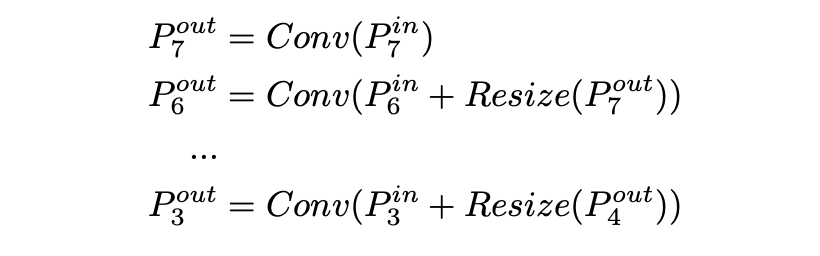

- BiFPN의 경우 모든 가중치의 합으로 가중치를 나눠줌
- 이 때 가중치들은 ReLU를 통과한 값으로 항상 0 이상
- 분모가 0이 되지 않도록 아주 작은 값 $ \epsilon $ 을 더해줌
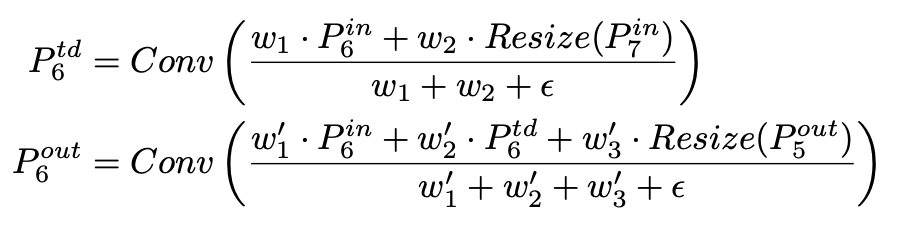

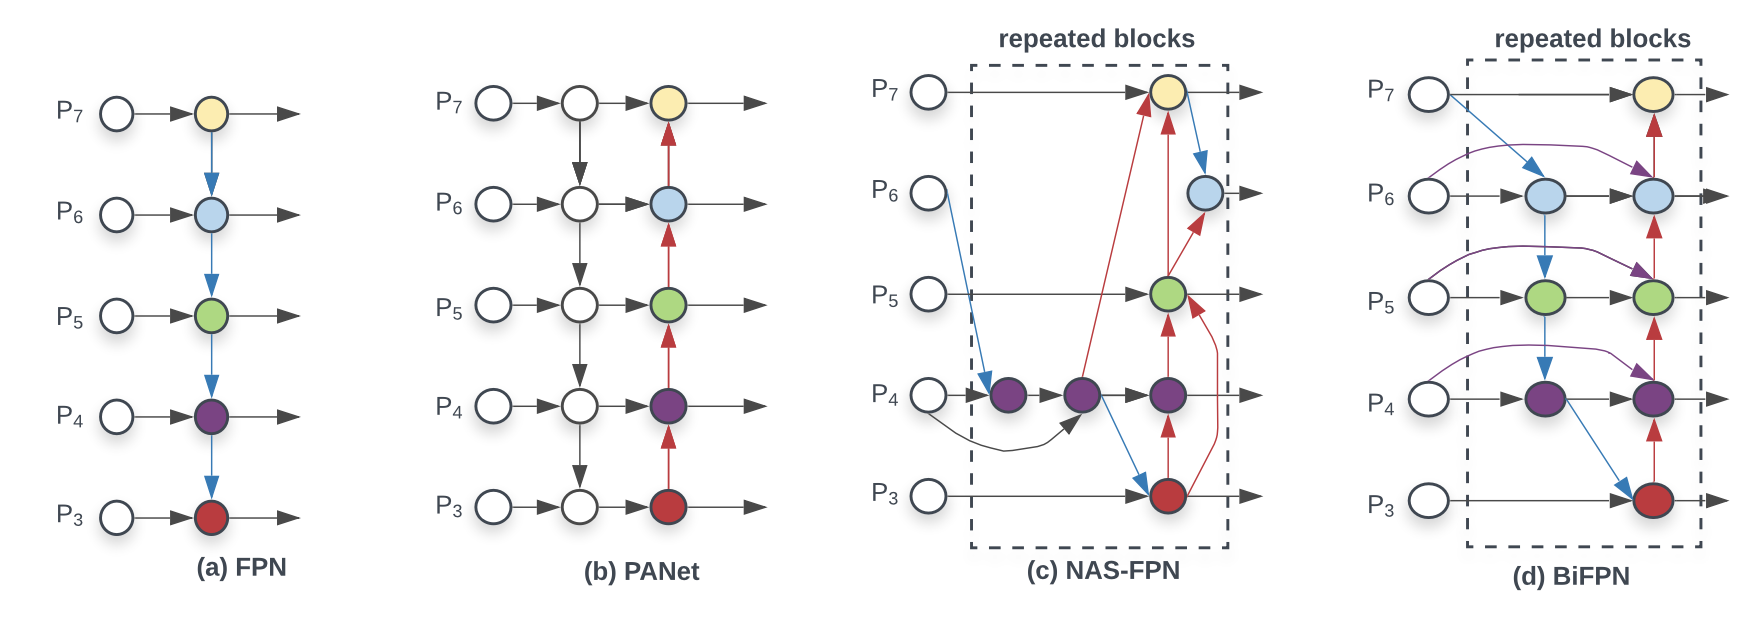

##### 2) Model Scaling
- 더 좋은 성능을 위해서는 더 큰 backbone 모델을 사용해 detector의 크기를 키우는 것이 일반적
- EfficientDet은 accuracy와 efficiency를 모두 잡기 위해, 여러 constraint를 만족시키는 모델을 찾고자 함
- 따라서 EfficientNet과 같은 compound scaling 방식을 제안
- EfficientNet B0 ~ B6을 backbone으로 사용
- BiFPN network: 네트워크의 width(=channels)와 depth(=layers)를 compound 계수에 따라 증가시킴 -> $W_{bifpn} = 64 \cdot (1.35)^{\phi}, D_{bifpn} = 3 + \phi $
- Box/Class prediction network: Width는 고정, Depth를 다음과 같은 식에 따라 증가 -> $ D_{box} = D_{class} = 3 + \lfloor \phi / 3 \rfloor $
- Input image resolution: Resolution을 다음과 같이 선형적으로 증가 -> $ R_{input} = 512 + \phi \cdot 128 $

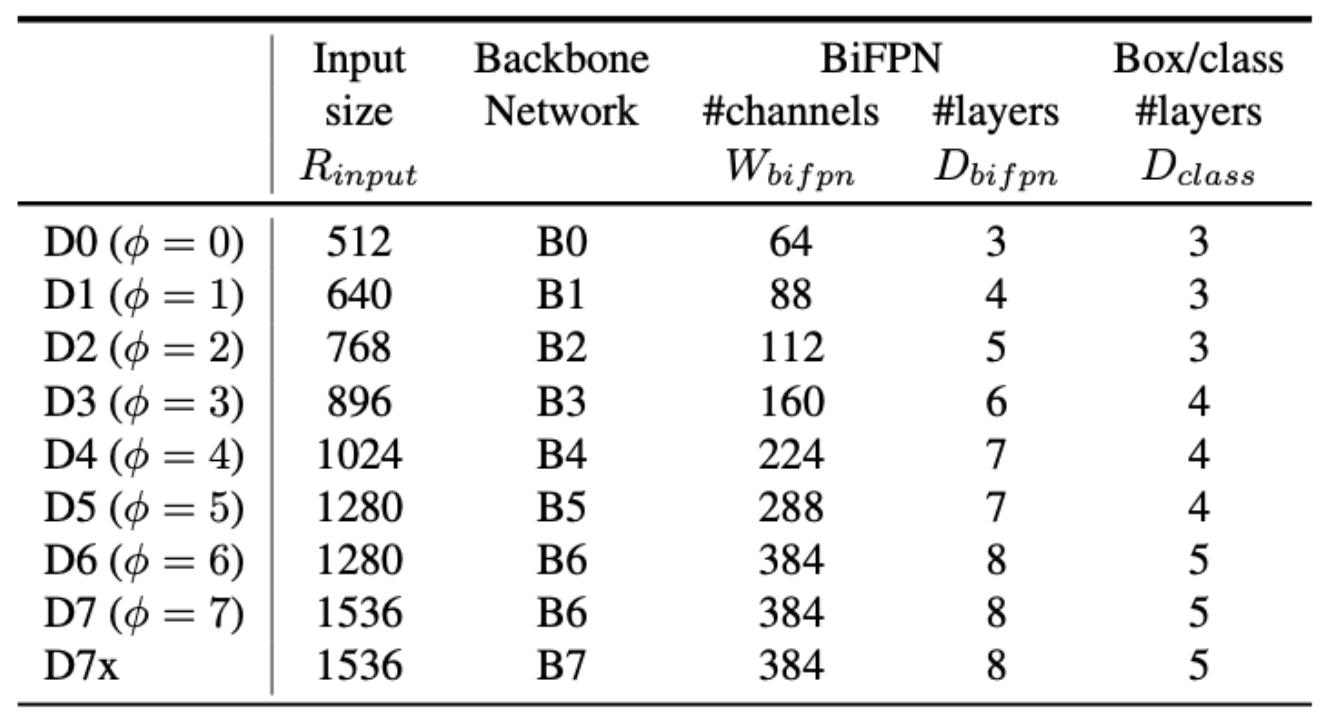